#STEP 1 :Importing Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
cancer_df=pd.read_csv("/content/cervical_cancer.csv")

In [ ]:
cancer_df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


#STEP 2 :Exploratory Data Analysis

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Dimension of the dataset
cancer_df.shape

(858, 36)

In [ ]:
#Replacing ? with NAN
cancer_df=cancer_df.replace("?",np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


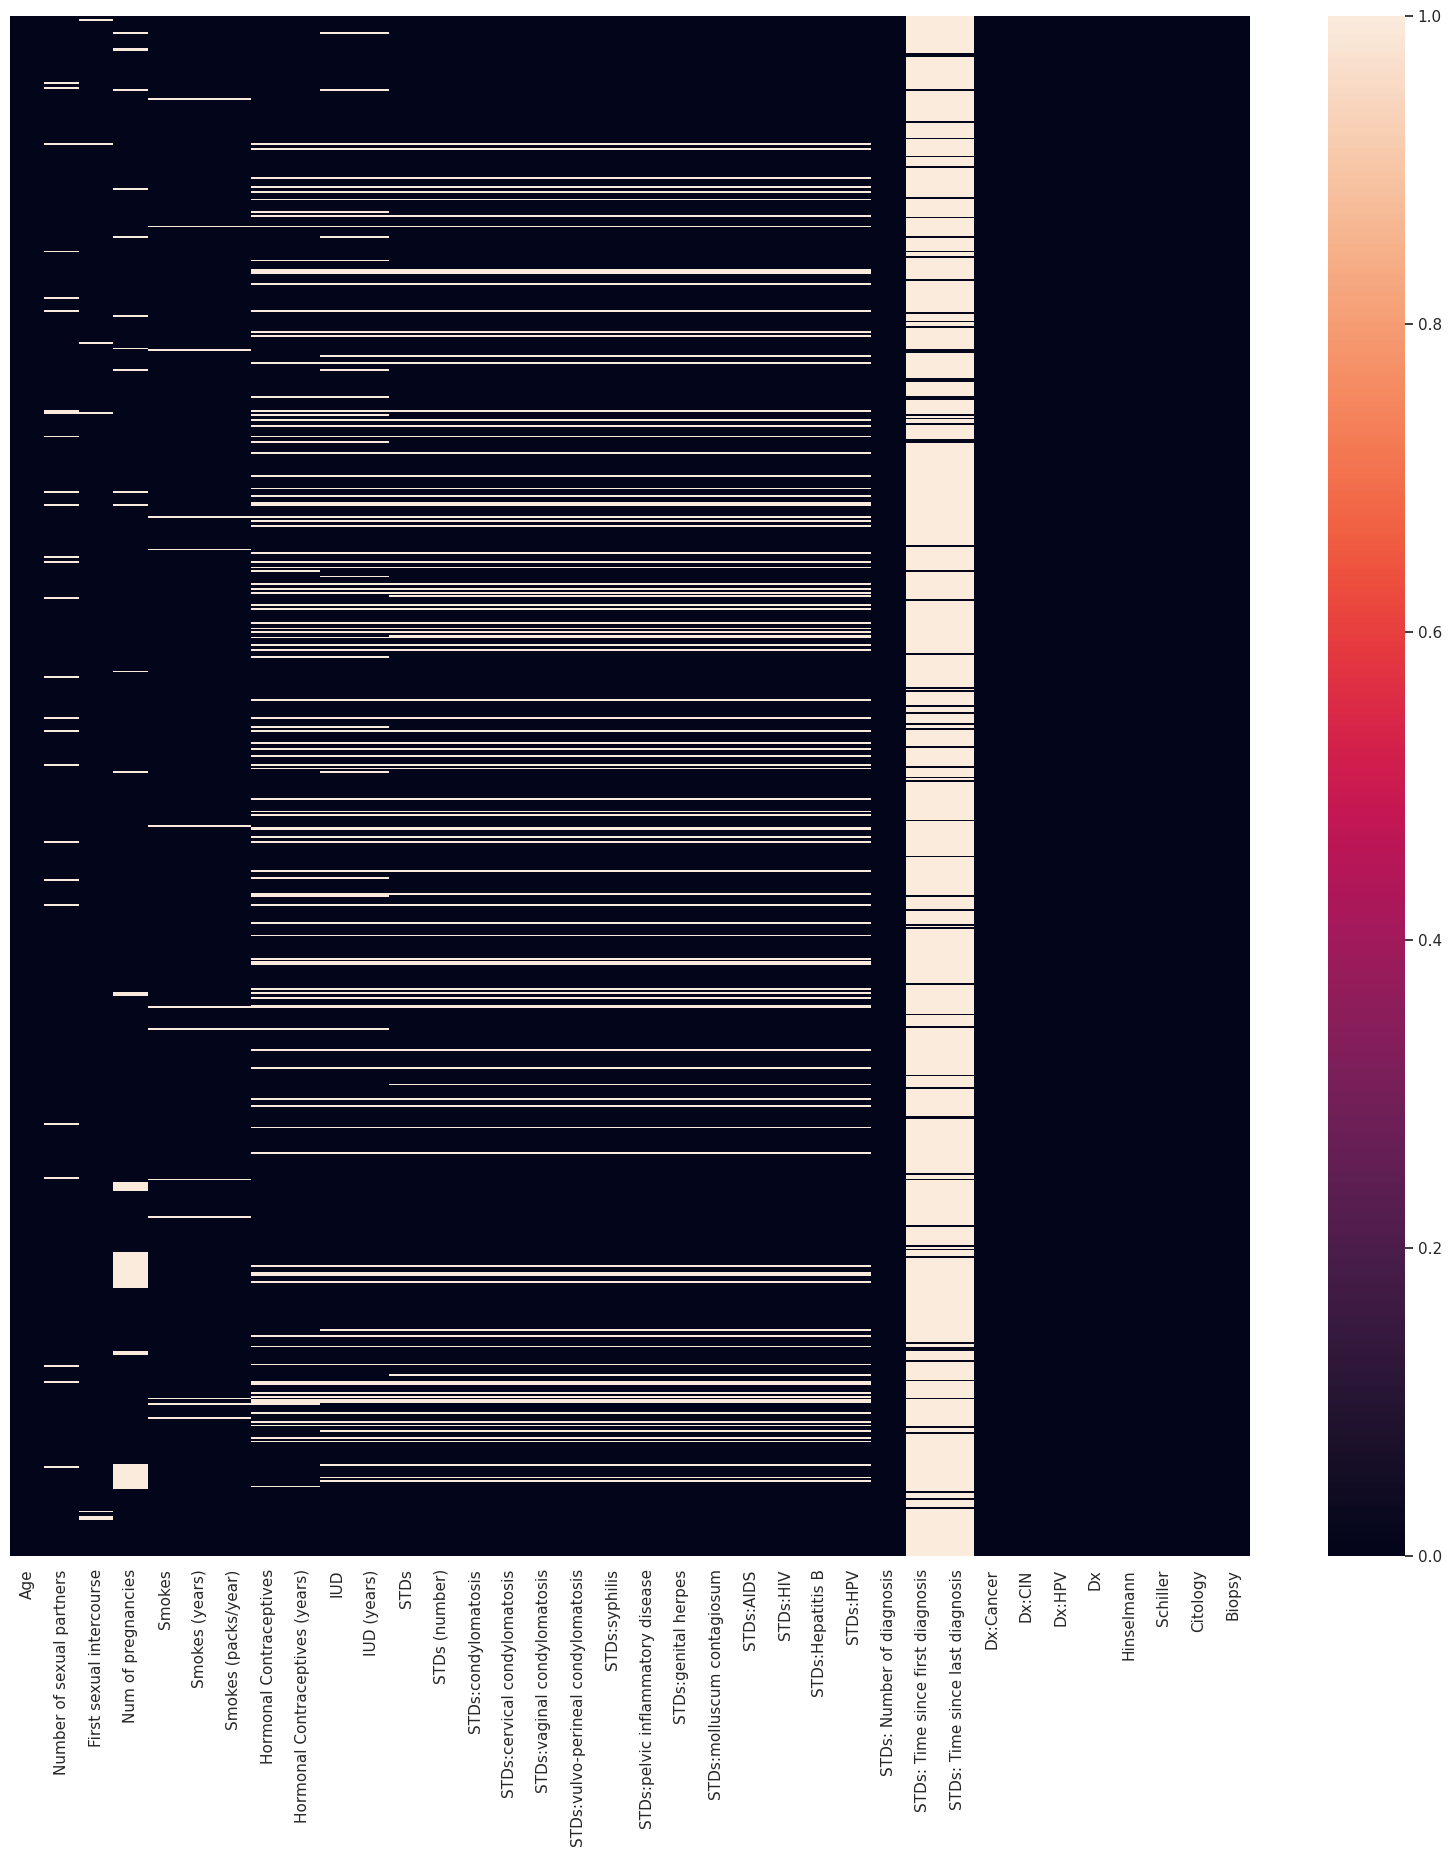

In [ ]:
#plotting the heatmap to visualize the number of NAN's in the data
sns.set_theme(style='white')
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.isnull(),yticklabels=False)
plt.show()

In [ ]:
# WE OBSERVE THAT THERE ARE A LOT OF NAN VALUES IN "STD'S: TIME SINCE FIRST DIAGNOSIS" AND "STD'S: TIME SINCE LAST DIAGNOSIS"
# SO WE WILL DROP THESE COLUMNS

cancer_df = cancer_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
# Converting the column data types, from object to numeric in order to perform Statistical Analysis of the Data
cancer_df=cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cancer_df.mean()

,0
Age,26.820513
Number of sexual partners,2.527644
First sexual intercourse,16.995300
Num of pregnancies,2.275561
Smokes,0.145562
Smokes (years),1.219721
Smokes (packs/year),0.453144
Hormonal Contraceptives,0.641333
Hormonal Contraceptives (years),2.256419
IUD,0.112011


In [ ]:
#Replacing the null values/NAN's with mean value
cancer_df=cancer_df.fillna(cancer_df.mean())
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


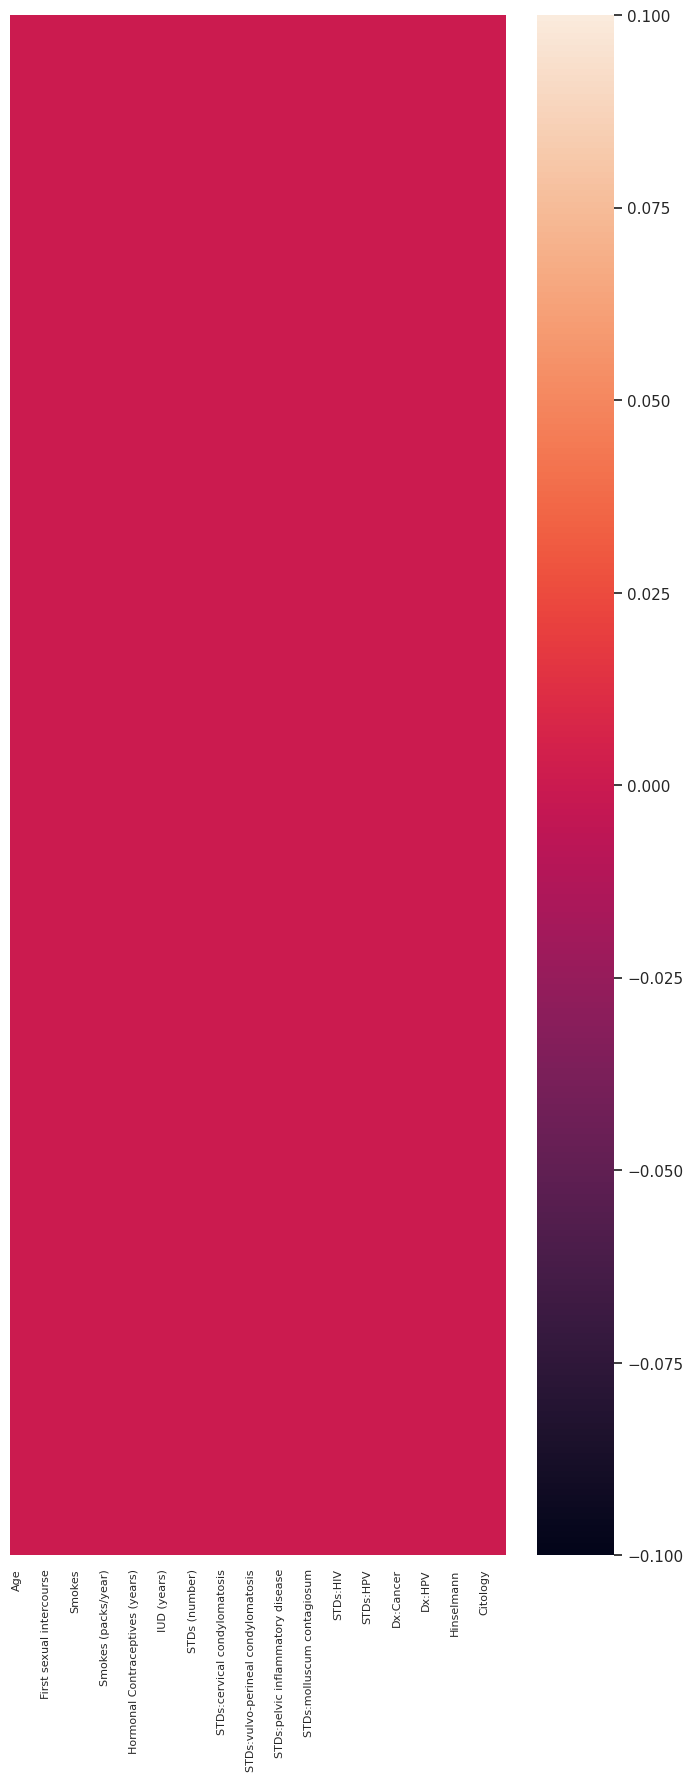

In [ ]:
#Plotting the heatmap again to visualize and check our data cleansing
plt.figure(figsize=(8,20))
sns.heatmap(cancer_df.isnull(),yticklabels=False)
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [ ]:
#NOW WE CAN SEE THERE ARE NO NULL VALUES/NAN's

In [ ]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#PEOPLE INVOLVED IN THE STUDY ARE IN THE AGES OF 13-84

#STEP 3: Performing Data Visualization

In [ ]:
# WE'LL TRY TO OBSERVE THE CORELATION BETWEEN DIFFERENT FEATURES IN OUR DATASETS:

corr_matrix = cancer_df.corr()

corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


In [ ]:
cancer_df.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


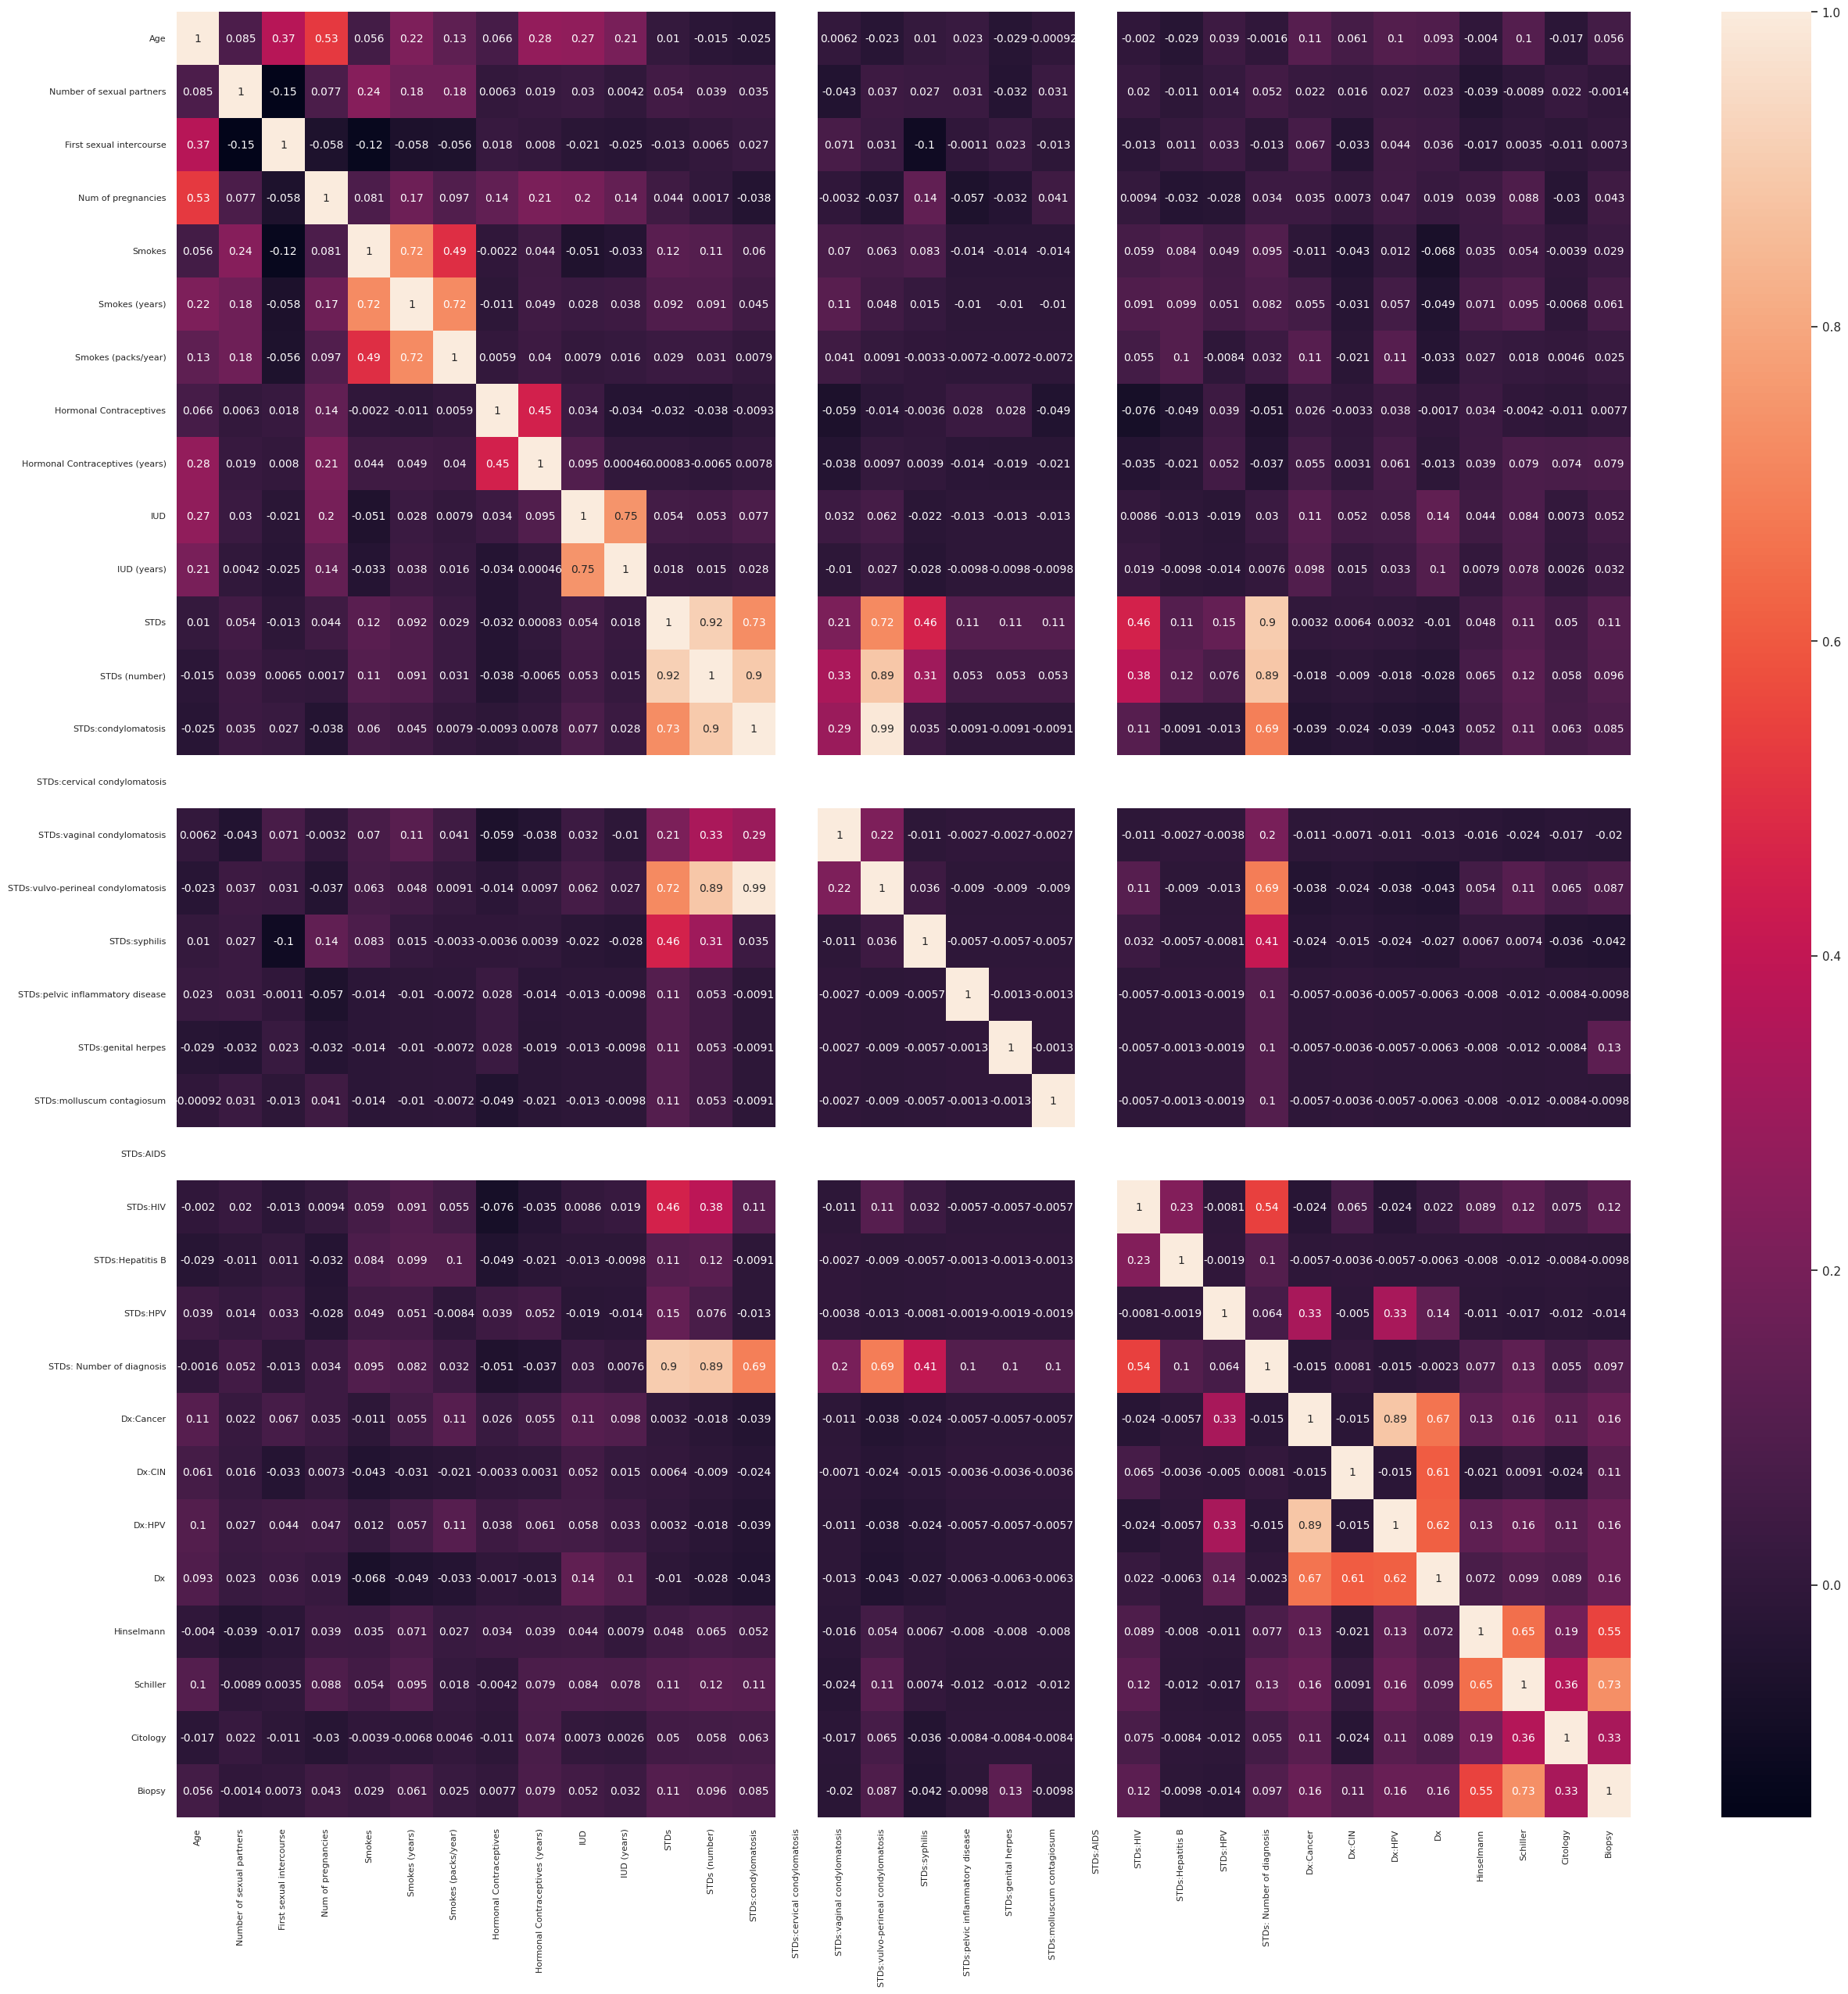

In [ ]:
#PLOTTING THE HEATMAP FOR CORRELATION MATRIX
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,annot_kws={'size':10})
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

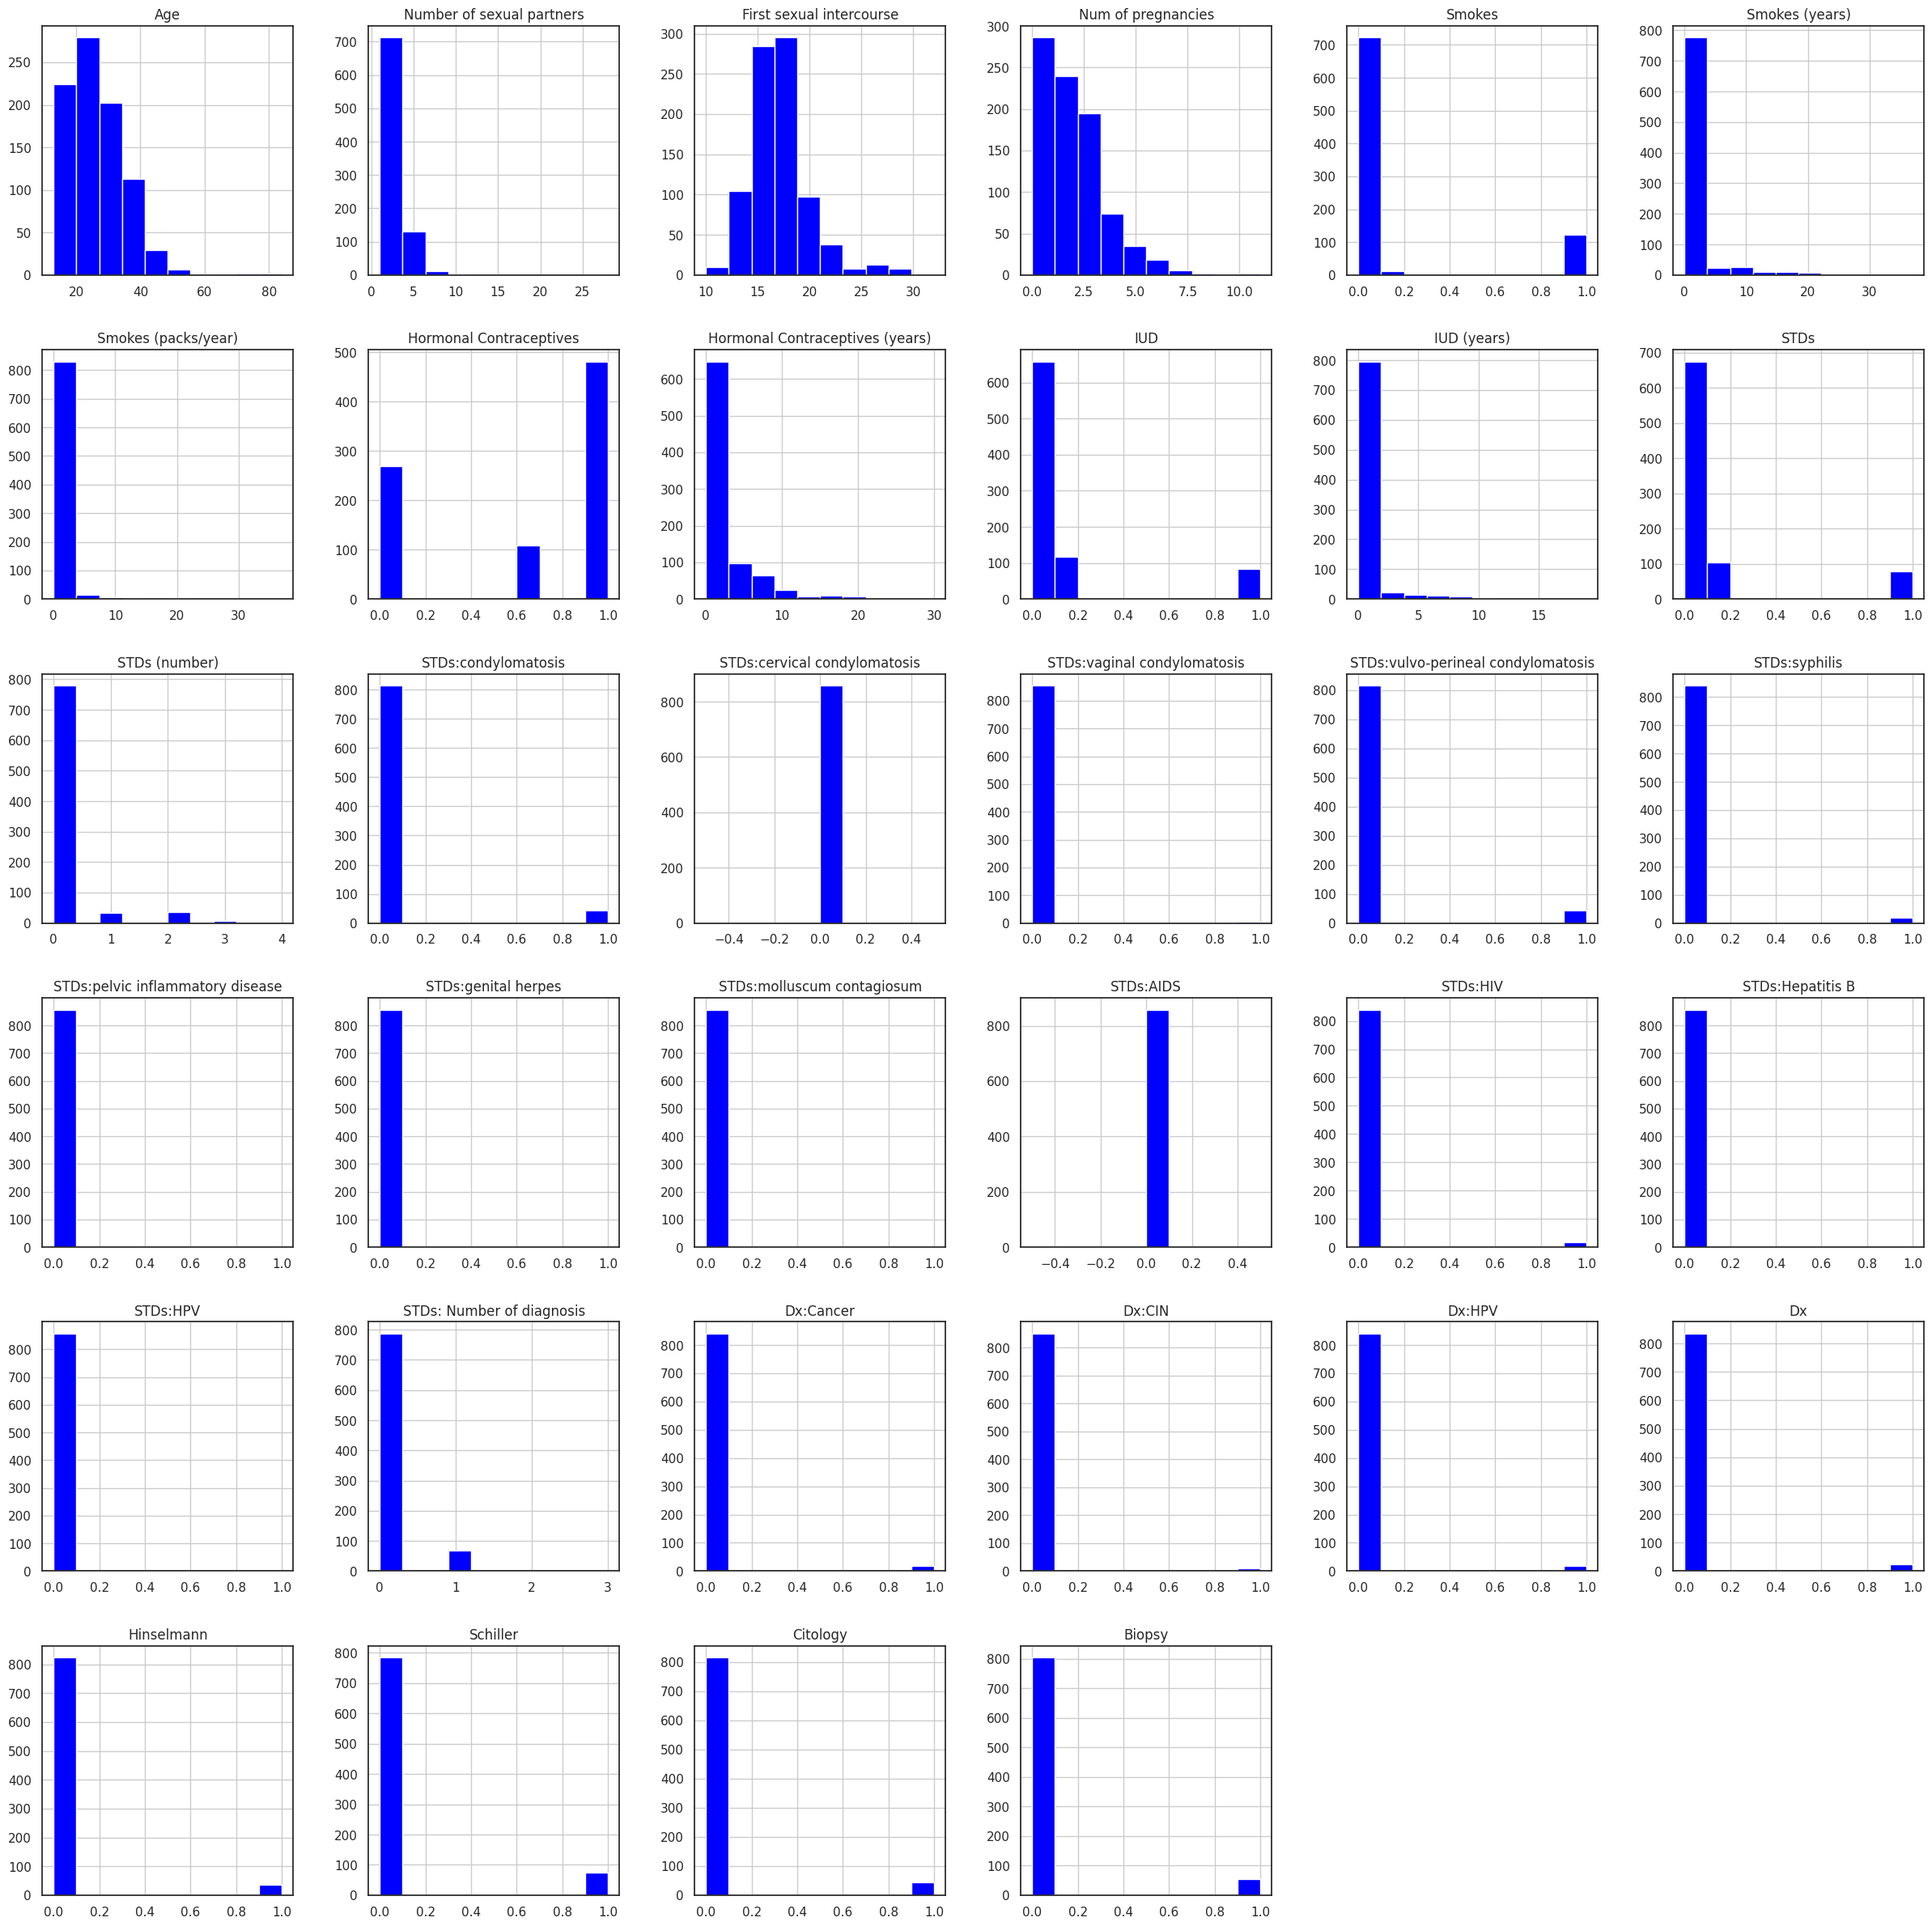

In [ ]:
#VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
cancer_df.hist(bins=10,figsize=(30,30),color='blue')
plt.show()

#STEP 4: Preparing DATa before training

In [ ]:
#WE SELECT BIOPSY AS THE TARGET VARIABLE/OUTPUT :
input_df=cancer_df.drop('Biopsy',axis=1)
target_df=cancer_df['Biopsy']

In [ ]:
X=np.array(input_df).astype("float32")
y=np.array(target_df).astype('float32')
y=y.reshape(-1,1)

In [ ]:
#now using standard scaler to get all the data in a similar range
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435463e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

In [ ]:
#Splitting Data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

#STEP 5: Training and Evaluating XGBoost Classifier

In [ ]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#Testing out the results of our model

In [ ]:
result_train=model.score(X_train,y_train)
result_train

1.0

In [ ]:
result_test=model.score(X_test,y_test)
result_test

0.9534883720930233

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
#now print Classification report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        79
         1.0       0.67      0.86      0.75         7

    accuracy                           0.95        86
   macro avg       0.83      0.91      0.86        86
weighted avg       0.96      0.95      0.96        86



In [ ]:
#accuracy score on training data
accuracy_score_test=accuracy_score(y_test,y_predict)
accuracy_score_test

0.9534883720930233

In [ ]:
#accuracy score on testing data
accuracy_score_test=accuracy_score(y_test,y_predict)
accuracy_score_test

0.9534883720930233

#PLotting a confusion Matrix

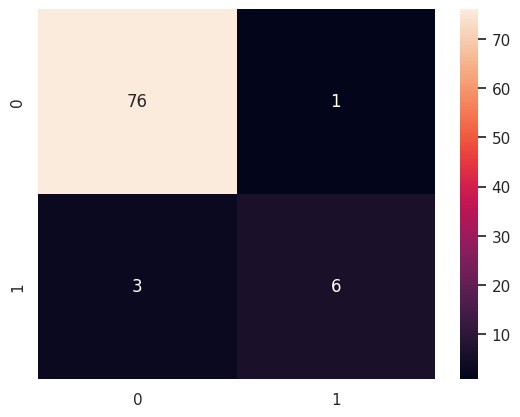

In [ ]:
cm=confusion_matrix(y_predict,y_test)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()
